# : - Imports

In [9]:
import sys
import os
import pandas as pd

project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))
if project_root not in sys.path:
    sys.path.append(project_root)
    
from sklearn.model_selection import train_test_split
from src.models.logistic_model import LogisticModel
from src.models.xgboost_model import XGBoostModel
from src.models.ensemble_model import RandomForestModel
from src.models.evaluator import Evaluator

# : - Load data

In [10]:
df_balanced = pd.read_csv("../../data/processed/cleaned_balanced_fraud_data.csv")

# : - Data preparation function

In [11]:
def prepare_data(df, target_col):
    X = df.drop(columns=[target_col])
    y = df[target_col]
    return train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# : - Prepare datasets

#### --- for balanced fraud  ---

In [12]:
X_train_b, X_test_b, y_train_b, y_test_b = prepare_data(df_balanced,  "class")

#   :::::::::: - Train and evaluate on Credit Card Dataset - :::::::::: 

# --- LogisticModel on credit card dataset  ---


--- Evaluation: Logistic Regression ---
AUC-PR: 0.8087
F1 Score: 0.6835
Confusion Matrix:
[[26393 14696]
 [12129 28959]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.64      0.66     41089
           1       0.66      0.70      0.68     41088

    accuracy                           0.67     82177
   macro avg       0.67      0.67      0.67     82177
weighted avg       0.67      0.67      0.67     82177



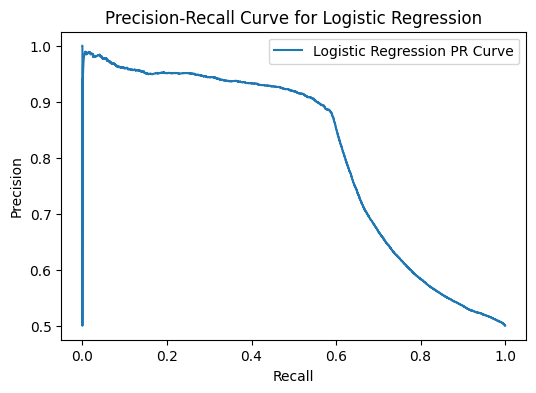

{'auc_pr': np.float64(0.8086656117140066),
 'f1': 0.6834546806225883,
 'confusion_matrix': array([[26393, 14696],
        [12129, 28959]])}

In [13]:
lr_b = LogisticModel()
lr_b.train(X_train_b, y_train_b)
Evaluator.evaluate(lr_b, X_test_b, y_test_b)

# --- XGBoostModel credit card dataset ---


--- Evaluation: XGBoost ---
AUC-PR: 0.9780
F1 Score: 0.9439
Confusion Matrix:
[[40993    96]
 [ 4283 36805]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     41089
           1       1.00      0.90      0.94     41088

    accuracy                           0.95     82177
   macro avg       0.95      0.95      0.95     82177
weighted avg       0.95      0.95      0.95     82177



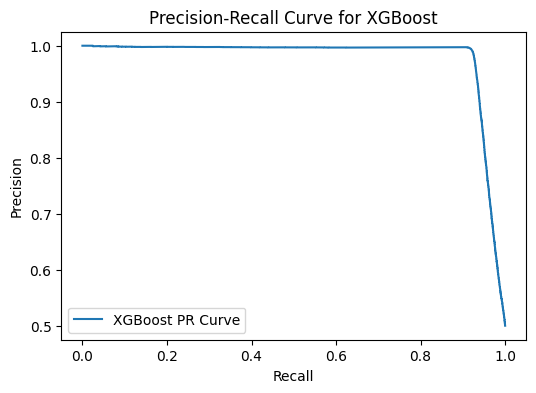

{'auc_pr': np.float64(0.9780161547317993),
 'f1': 0.9438510559181423,
 'confusion_matrix': array([[40993,    96],
        [ 4283, 36805]])}

In [14]:
xgb_b = XGBoostModel()
xgb_b.train(X_train_b, y_train_b)
Evaluator.evaluate(xgb_b, X_test_b, y_test_b)

##  Best-Performing Model: XGBoost



The evaluation results clearly show that **XGBoost** significantly outperforms **Logistic Regression** across all major metrics.

| **Metric**            | **XGBoost** | **Logistic Regression** |
|------------------------|-------------|--------------------------|
| AUC-PR                 | **0.9780**  | 0.8087                   |
| F1 Score               | **0.9439**  | 0.6835                   |
| Accuracy               | **~95%**    | ~67%                     |
| Recall (Fraud Class)   | **0.90**    | 0.70                     |
| Precision (Fraud Class)| **1.00**    | 0.66                     |

